# Imports and set up

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, confusion_matrix, f1_score, roc_auc_score, classification_report

from edawesome import EDA

In [2]:
# supress warnings for logistic regression
import warnings
warnings.filterwarnings('ignore')

In [3]:
# autoreload modules
%load_ext autoreload
%autoreload 2

In [4]:
SEED = 42

In [5]:
eda = EDA(
    '/home/dreamtim/Desktop/Coding/turing-ds/MachineLearning/tiryko-ML1.1/data',
    kaggle_datasets=['tejashvi14/travel-insurance-prediction-data']
)
eda.load_data()

# Loading data

### travel_insurance_prediction

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
index,,,,,,,,,
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    1987 non-null   int64 
 1   employment_type        1987 non-null   object
 2   graduate_or_not        1987 non-null   object
 3   annual_income          1987 non-null   int64 
 4   family_members         1987 non-null   int64 
 5   chronic_diseases       1987 non-null   int64 
 6   frequent_flyer         1987 non-null   object
 7   ever_travelled_abroad  1987 non-null   object
 8   travel_insurance       1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


None

In [6]:
eda.clean_check()

# Check for bad values

### Nulls in travel_insurance_prediction

No nulls found...


### Duplicates in travel_insurance_prediction

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
index,,,,,,,,,
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,33,Government Sector,Yes,800000,3,0,Yes,No,0
10,31,Government Sector,Yes,400000,9,1,No,No,0
...,...,...,...,...,...,...,...,...,...
1976,32,Government Sector,Yes,900000,6,0,No,No,0
1981,27,Government Sector,Yes,850000,3,0,No,No,1
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1


In [7]:
eda.categorize()

# Identifiying categorical features

### Categories in travel_insurance_prediction

Converted to categorical:


['graduate_or_not',
 'ever_travelled_abroad',
 'employment_type',
 'frequent_flyer',
 'chronic_diseases',
 'travel_insurance']

# Exploring numeric features

### Numeric features in travel_insurance_prediction

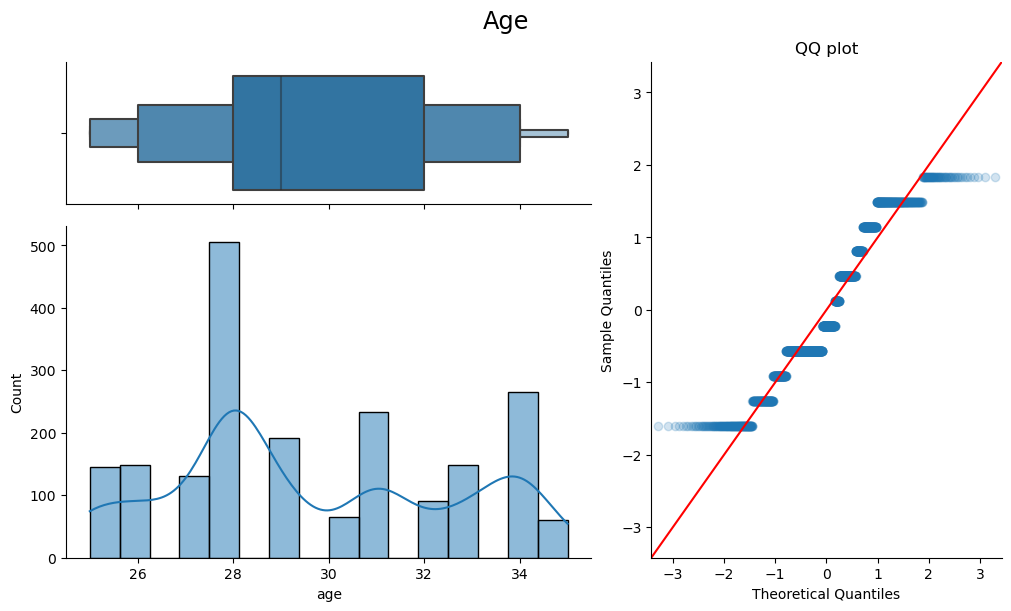

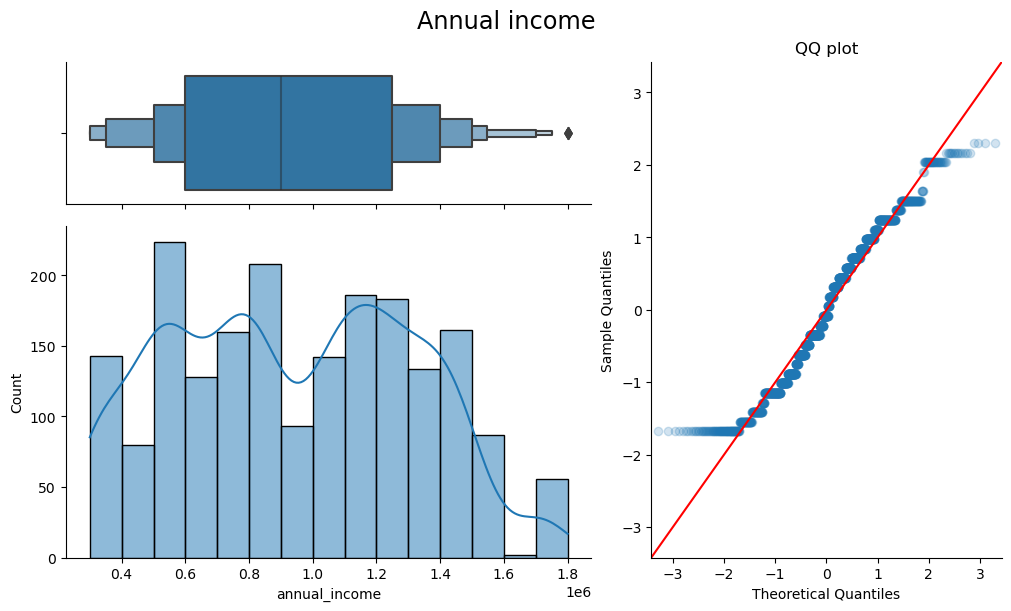

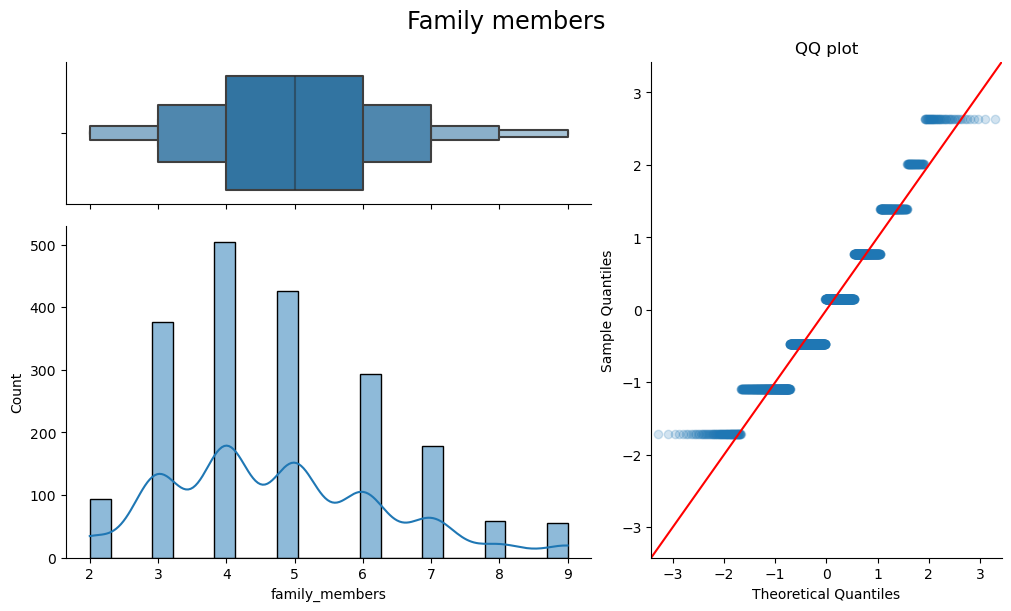

In [8]:
eda.explore_numerics()

**We are going to predict in travel_insurance, let us explore this feature.**

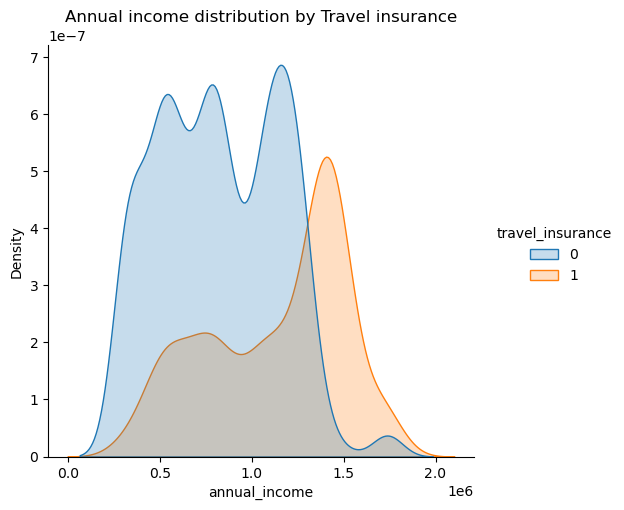

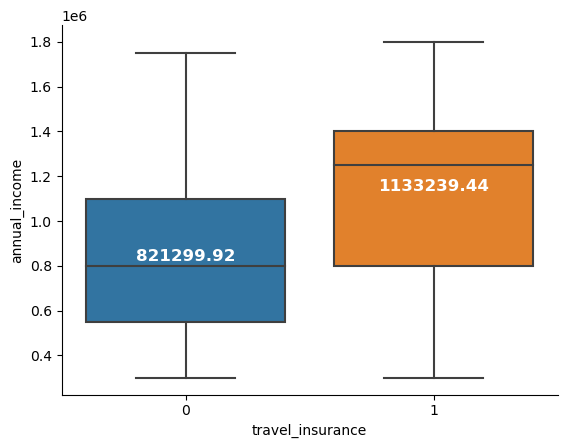

Compare means with t-test:
p-value: 6.63501776035329e-76
Reject null hypothesis!


In [9]:
eda.compare_distributions(
    'travel_insurance_prediction',
    'annual_income',
    'travel_insurance'
)

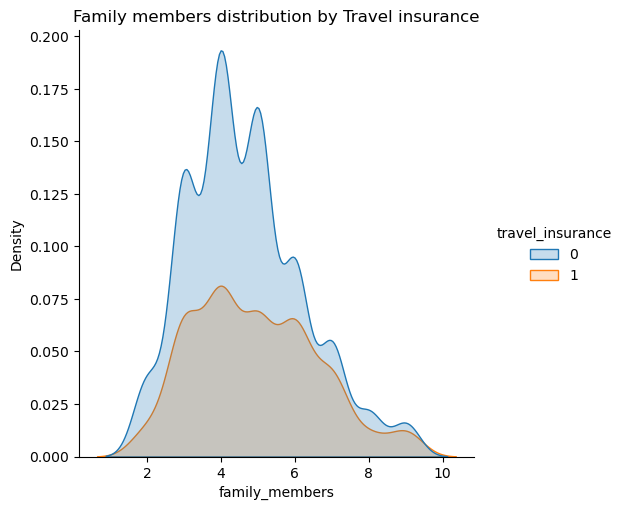

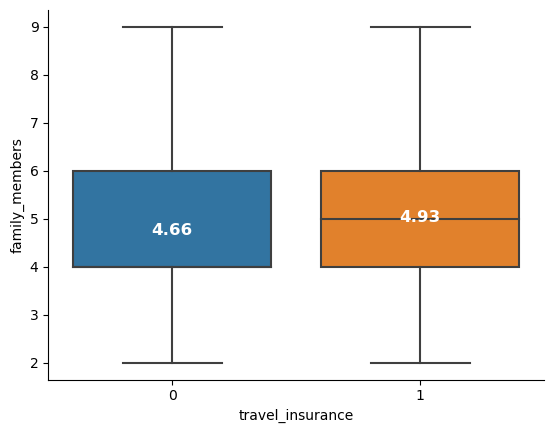

Compare means with t-test:
p-value: 0.0003632080073866233
Reject null hypothesis!


In [10]:
eda.compare_distributions(
    'travel_insurance_prediction',
    'family_members',
    'travel_insurance'
)

Good news: at least means of our numeric features are different for people who bought travel insurance and people who didn't. This means that we can use them in our model.

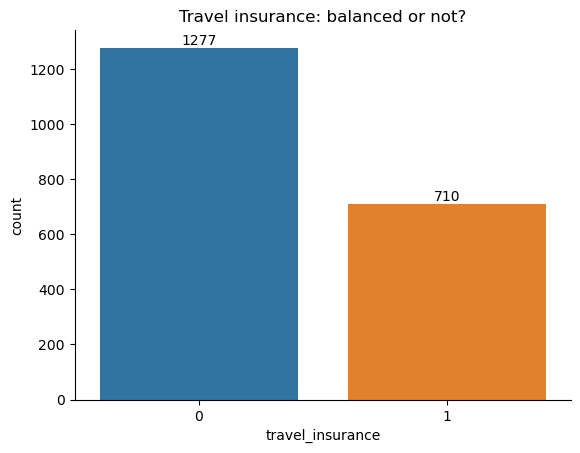

In [11]:
sns.countplot(
    data=eda.data.travel_insurance_prediction,
    x='travel_insurance',
)
plt.bar_label(plt.gca().containers[0])
plt.title('Travel insurance: balanced or not?')
sns.despine()
plt.show()

**We have a bit more people with travel insurance than without, but generally the dataset is balanced.**

# Feature engineering

In [12]:
df = eda.data.travel_insurance_prediction

In [13]:
df['income_per_person'] = df['annual_income'] / df['family_members']

# Machine Learning

We don't have any domain specifics regarding our goal, so we will use just `roc_auc` as a metric.

In reality, I would ask a business person to define what is the most important metric for us. For example, if we are trying to predict if a person will buy a product, we would like to minimize the number of false negatives (people who will buy the product, but we will predict that they won't). In this case, we would like to maximize `recall` (or `sensitivity`).

### Preparing the data

In [14]:
categorical_predictors = df.select_dtypes(include='category').columns.to_list()
categorical_predictors.remove('travel_insurance')

numeric_predictors = df.select_dtypes(include='number').columns

In [15]:
preparation_pipele = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_predictors),
    ('categorical_encoder', OneHotEncoder(), categorical_predictors),
])

In [16]:
# Get predictors and target from the EDA
X = df.drop('travel_insurance', axis=1)
y = df.travel_insurance.values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train = preparation_pipele.fit_transform(X_train)

### Helper functions

In [18]:
def plot_roc_curve(fpr, tpr, title=None):

    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')

    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)

    plt.show()

In [19]:
def pretty_classification_report(estimator, X, y, class_names, how='cv'):

    y_pred = estimator.predict(X_train)

    if how == 'cv':
        f_score = cross_val_score(estimator, X, y, cv=5, scoring='f1').mean()
    elif how == 'test':
        f_score = f1_score(y, y_pred)
    else:
        raise ValueError('how must be either "cv" or "test"')

    cm = confusion_matrix(y_train, y_pred)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # heatmap of confusion matrix
    sns.heatmap(cm_df, annot=True, cbar=None, cmap="Blues", fmt='d')
    plt.title(f'Cross-validated f-score: {f_score:.3f}')
    plt.ylabel('True Class'), plt.xlabel('Predicted Class')
    plt.tight_layout()
    plt.show()

    if how == 'cv':
        roc_auc = cross_val_score(estimator, X, y, cv=5, scoring='roc_auc').mean()
    elif how == 'test':
        roc_auc = roc_auc_score(y, y_pred)
    else:
        raise ValueError('how must be either "cv" or "test"')

    # roc graph
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    plot_roc_curve(fpr, tpr, title=f'ROC curve (area = {roc_auc:.3f})')

In [20]:
# TODO: probably dividie into separate functions
def best_report(search, class_names):
    estimator = search.best_estimator_
    print(f'Best estimator:\n{estimator}')
    print(f'Best score from search: {search.best_score_}')
    pretty_classification_report(estimator, X_train, y_train, class_names, how='cv')
    

In [21]:
class_names = ['With insurance', 'No insurance']

### Logistic Regression

In [22]:
logistic_regression = LogisticRegression(random_state=SEED)

In [23]:
# Grid search for l1 and l2 penalty
grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

l1_l2_grid_search = GridSearchCV(logistic_regression, grid, cv=5, scoring='roc_auc')

l1_l2_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc')

In [24]:
# Grid search for elastic net
grid = {
    'penalty': ['elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['saga'],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

elasticnet_grid_search = GridSearchCV(logistic_regression, grid, cv=5, scoring='roc_auc')

elasticnet_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9],
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             scoring='roc_auc')

Best estimator:
LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')
Best score from search: 0.7708303271626924


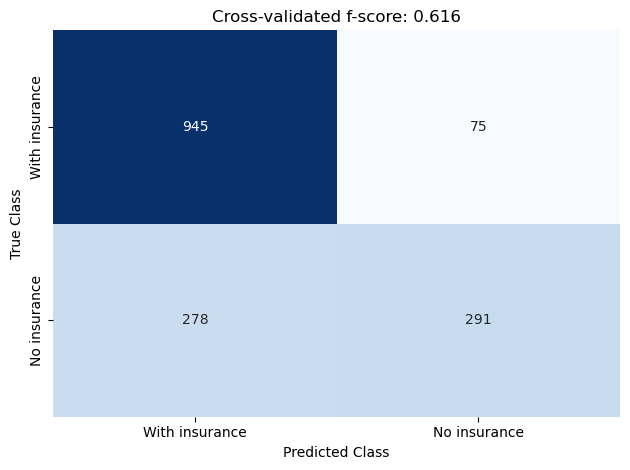

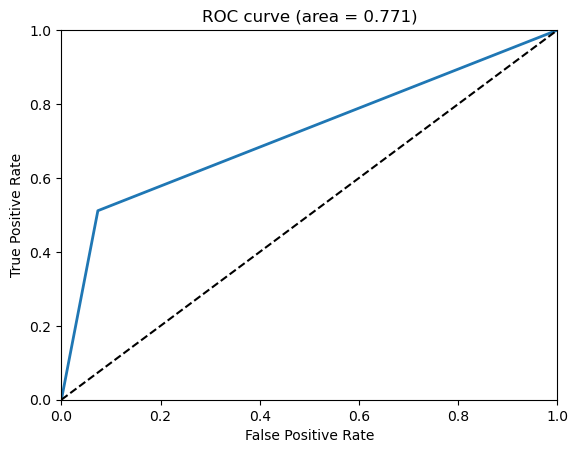

In [25]:
best_report(l1_l2_grid_search, class_names)

Best estimator:
LogisticRegression(C=0.1, l1_ratio=0.6, penalty='elasticnet', random_state=42,
                   solver='saga')
Best score from search: 0.7712534742199939


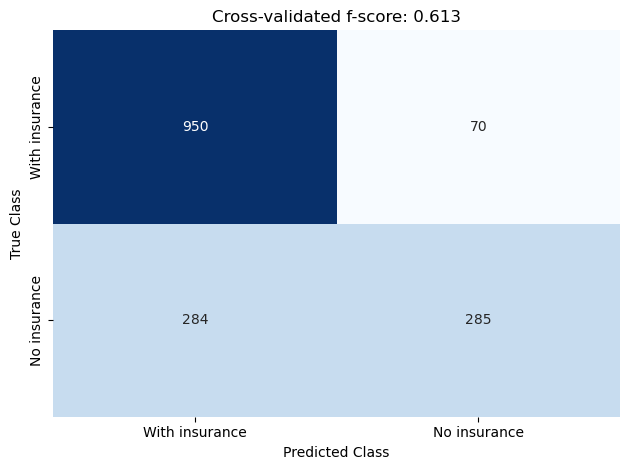

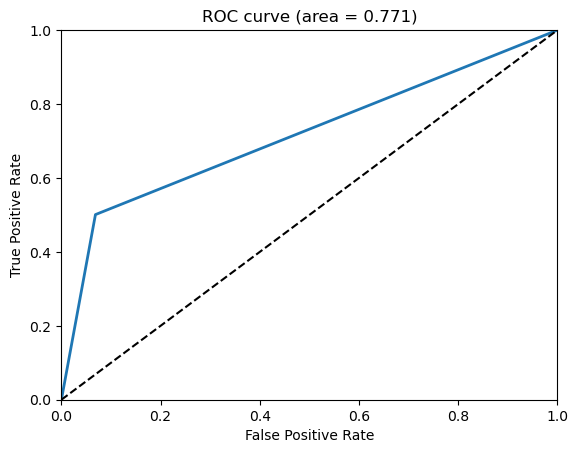

In [26]:
best_report(elasticnet_grid_search, class_names)

### KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier()

In [28]:
max_k = len(X_train) // 10

In [29]:
# Grid search for KNeighborsClassifier
from gc import callbacks


grid = {
    'n_neighbors': np.arange(1, max_k)
}

knn_grid_search = GridSearchCV(knn, grid, cv=5, scoring='roc_auc')

knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157])},
             scoring='roc_auc')

Best estimator:
KNeighborsClassifier(n_neighbors=117)
Best score from search: 0.8014541874815443


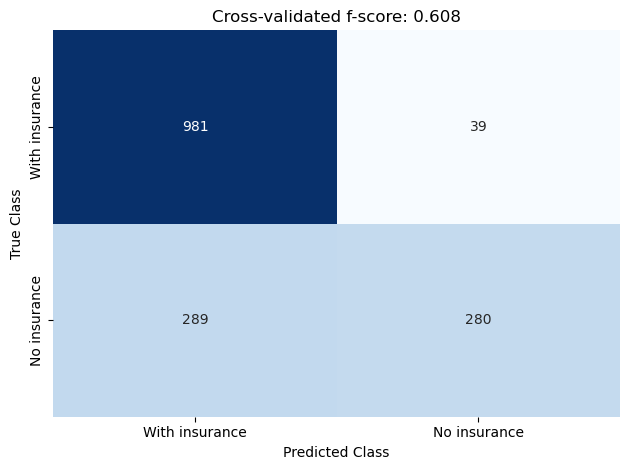

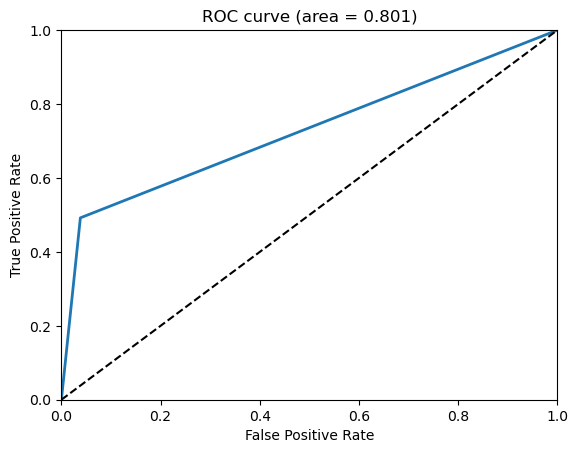

In [30]:
best_report(knn_grid_search, class_names)

In [31]:
def plot_cv_results(grid_search, param_name):
    plt.plot(grid_search.cv_results_[f'param_{param_name}'].data, grid_search.cv_results_['mean_test_score'])
    plt.title(f'CV results for {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Mean test score')
    plt.show()

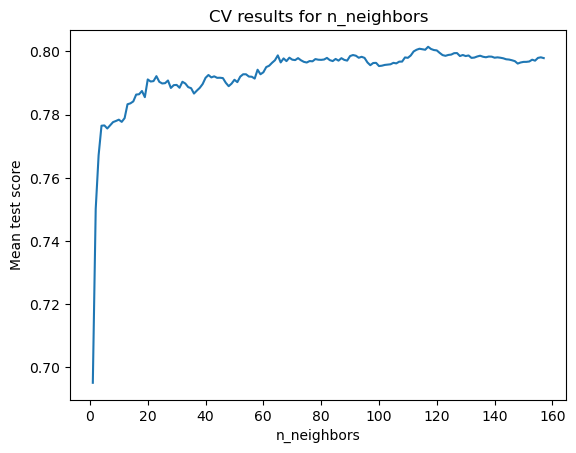

In [32]:
plot_cv_results(knn_grid_search, 'n_neighbors')

### DesicionTreeClassifier

In [33]:
tree = DecisionTreeClassifier(random_state=SEED)

In [34]:
# Grid search for DecisionTreeClassifier

grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10)

}

tree_grid_search = GridSearchCV(tree, grid, cv=5, scoring='roc_auc')

tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc')

In [35]:
# Random search for DecisionTreeClassifier

grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 30),
    'min_samples_split': np.arange(2, 30),
    'min_samples_leaf': np.arange(1, 30)
}

tree_random_search = RandomizedSearchCV(tree, grid, cv=5, scoring='roc_auc', n_iter=1000, random_state=SEED)

tree_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
                   random_state=42, scoring='roc_auc')

Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7,
                       random_state=42)
Best score from search: 0.8162957660940482


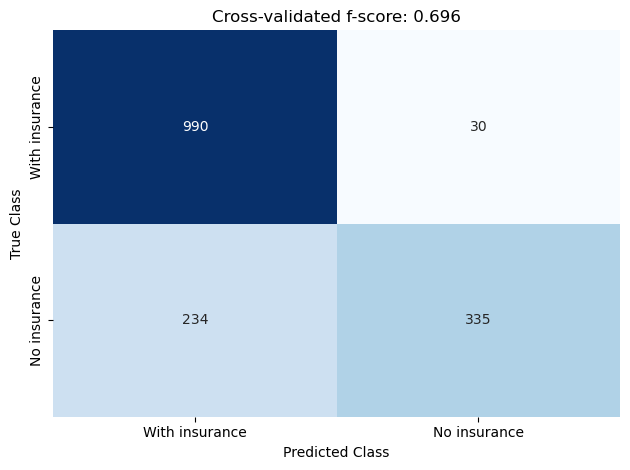

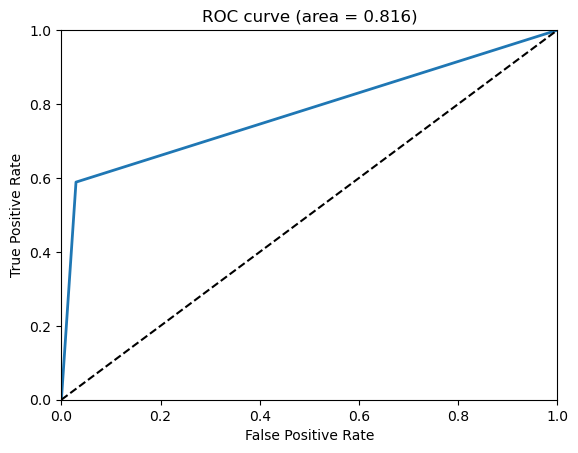

In [36]:
best_report(tree_grid_search, class_names)

Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=16,
                       min_samples_split=4, random_state=42)
Best score from search: 0.8158675580152881


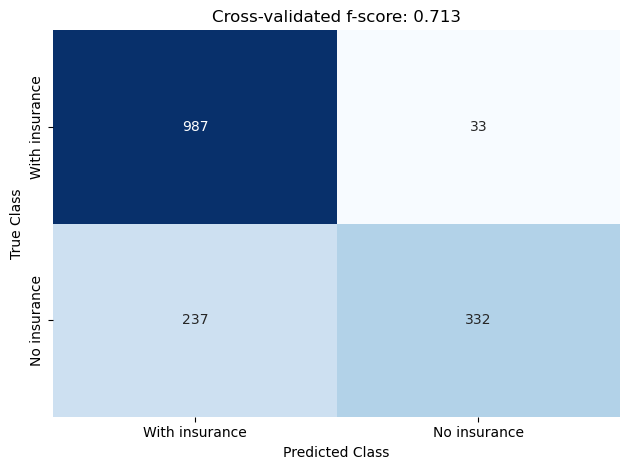

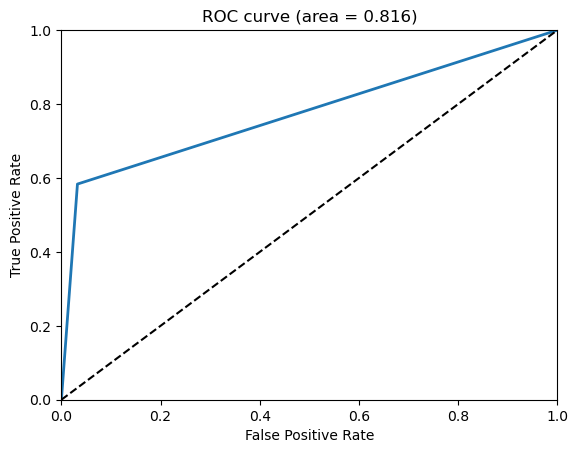

In [37]:
best_report(tree_random_search, class_names)

Random and grid search are not bery different.

**It's better, than KNN and Logistic Regression, but still not good enough. Let's try random forest!**

### RandomForestClassifier

In [38]:
forest = RandomForestClassifier(random_state=SEED)

In [39]:
# Random search for RandomForestClassifier

grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 30),
    'min_samples_split': np.arange(2, 30),
    'min_samples_leaf': np.arange(1, 30)
}

forest_random_search = RandomizedSearchCV(forest, grid, cv=5, scoring='roc_auc', n_iter=100, random_state=SEED)

forest_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'n_estimators': [10, 50, 100, 200,
                                                         500]},
                   random_state=42, scoring='roc_auc')

Best estimator:
RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=6,
                       min_samples_split=3, random_state=42)
Best score from search: 0.8068804015939554


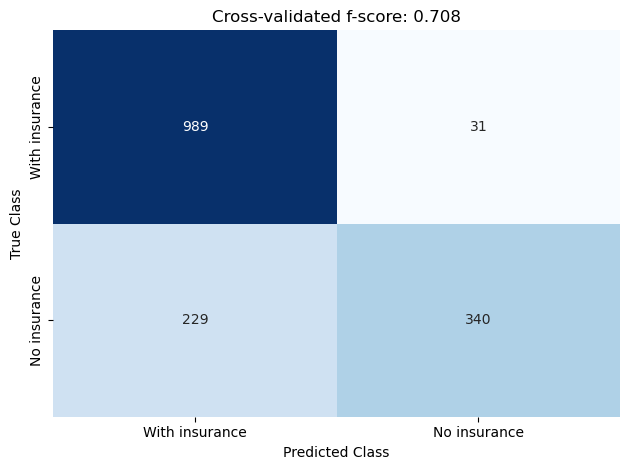

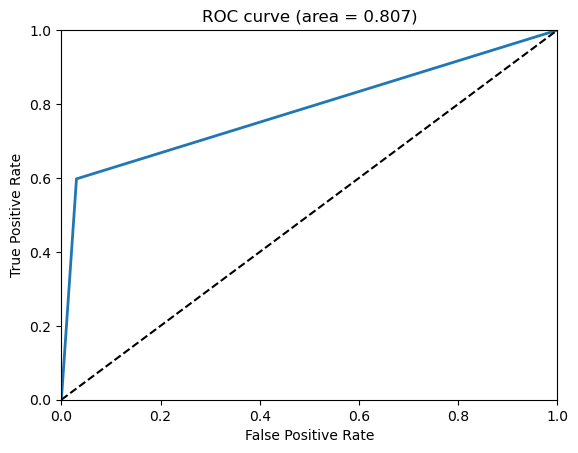

In [40]:
best_report(forest_random_search, class_names)

### SVM classifier

In [41]:
svm = SVC(random_state=SEED, probability=True)

In [42]:
# Random search for SVC

grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': np.arange(1, 5),
    'gamma': ['scale', 'auto']
}

svm_random_search = RandomizedSearchCV(svm, grid, cv=5, scoring='roc_auc', n_iter=10, random_state=SEED)

svm_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'degree': array([1, 2, 3, 4]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='roc_auc')

Best estimator:
SVC(C=1, gamma='auto', kernel='poly', probability=True, random_state=42)
Best score from search: 0.8035134143705612


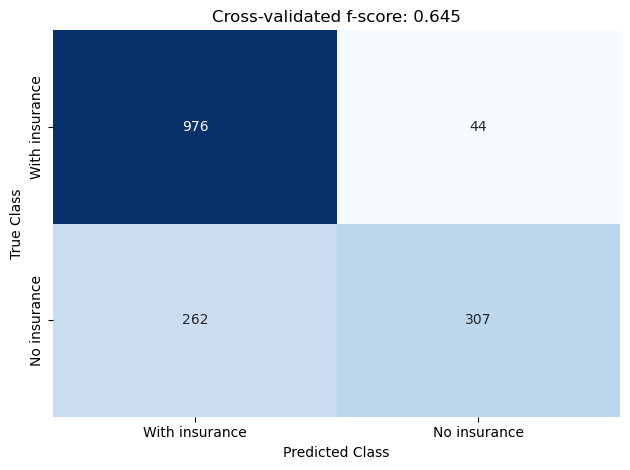

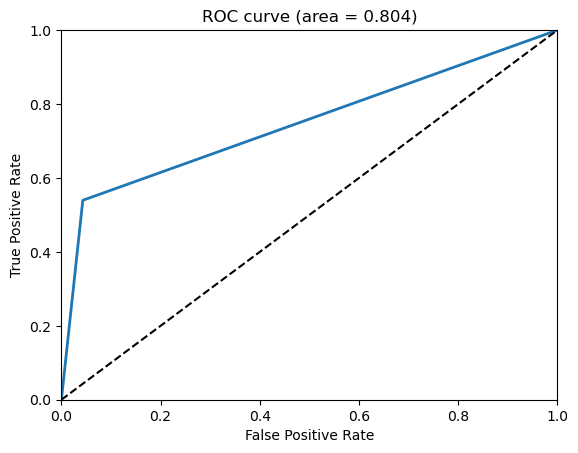

In [43]:
best_report(svm_random_search, class_names)

### Neural Network

In [52]:
# MLPClassifier

mlp = MLPClassifier(random_state=SEED, solver='adam', activation='relu', learning_rate='adaptive')

# Random search for MLPClassifier

grid = {
    'hidden_layer_sizes': [(5, ), (10,), (20,)],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

mlp_random_search = RandomizedSearchCV(mlp, grid, cv=5, scoring='roc_auc', n_iter=100, random_state=SEED)

mlp_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(learning_rate='adaptive',
                                           random_state=42),
                   n_iter=100,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'hidden_layer_sizes': [(5,), (10,),
                                                               (20,)]},
                   random_state=42, scoring='roc_auc')

Best estimator:
MLPClassifier(alpha=0.001, hidden_layer_sizes=(20,), learning_rate='adaptive',
              random_state=42)
Best score from search: 0.8012719526562371


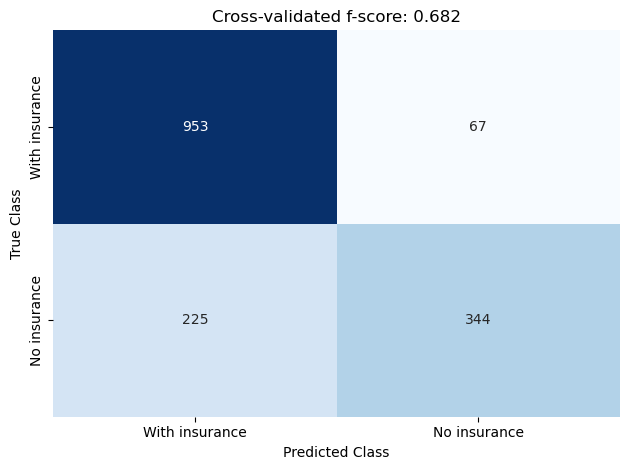

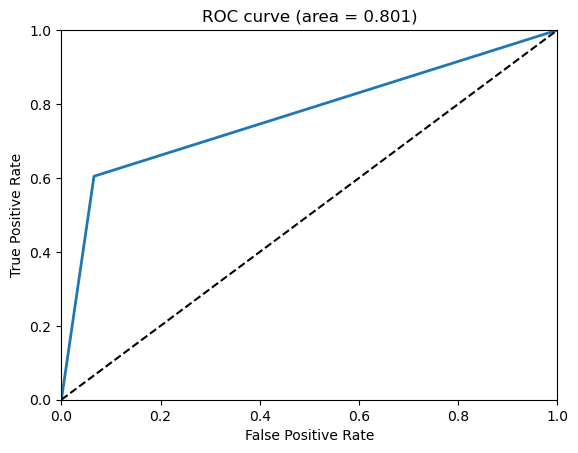

In [53]:
best_report(mlp_random_search, class_names)

### Ensemble best models

In [54]:
voting_classifier = VotingClassifier(
    voting='soft',
    estimators=[
        ('tree', tree_random_search.best_estimator_),
        ('svc', svm_random_search.best_estimator_),
        ('mlp', mlp_random_search.best_estimator_)
    ]
)

voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     min_samples_leaf=16,
                                                     min_samples_split=4,
                                                     random_state=42)),
                             ('svc',
                              SVC(C=1, gamma='auto', kernel='poly',
                                  probability=True, random_state=42)),
                             ('mlp',
                              MLPClassifier(alpha=0.001,
                                            hidden_layer_sizes=(20,),
                                            learning_rate='adaptive',
                                            random_state=42))],
                 voting='soft')

### Final model on train set

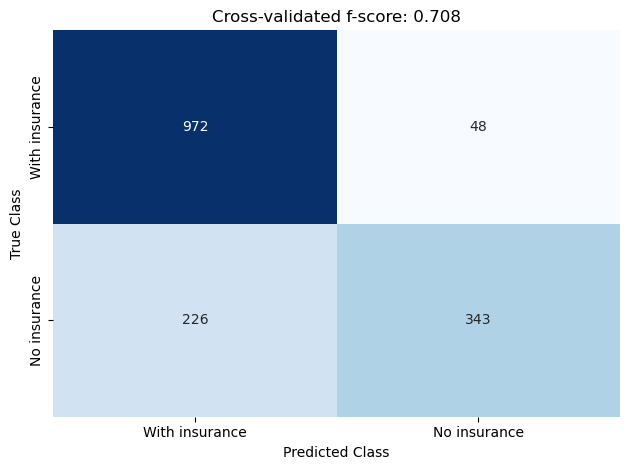

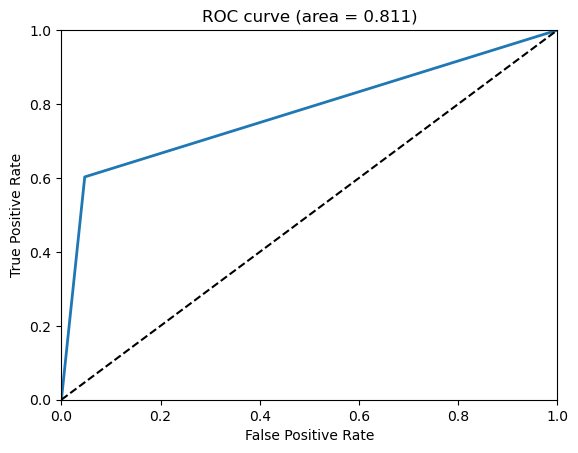

In [55]:
pretty_classification_report(voting_classifier, X_train, y_train, class_names, how='cv')

### Evaluate on test set

In [58]:
X_test = preparation_pipele.transform(X_test)

ValueError: X has 14 features, but ColumnTransformer is expecting 9 features as input.

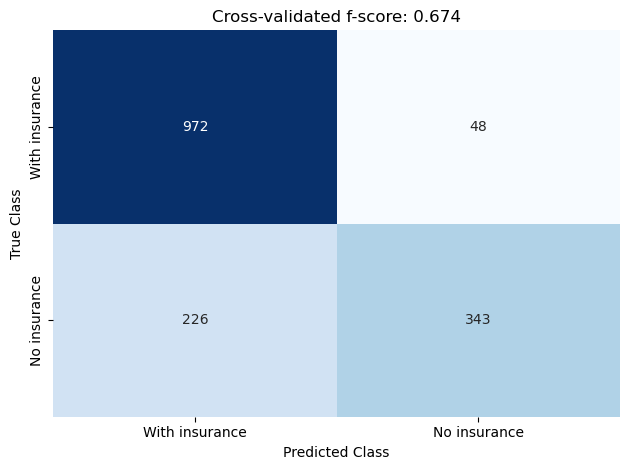

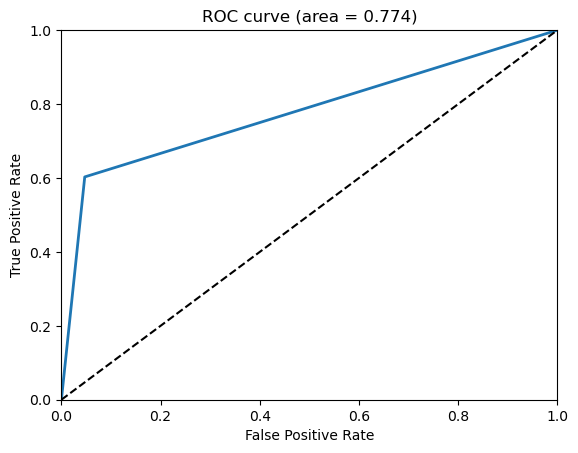

In [59]:
pretty_classification_report(voting_classifier, X_test, y_test, class_names)

In [60]:
print(classification_report(y_test, voting_classifier.predict(X_test), target_names=class_names))

                precision    recall  f1-score   support

With insurance       0.81      0.96      0.88       257
  No insurance       0.90      0.57      0.70       141

      accuracy                           0.83       398
     macro avg       0.85      0.77      0.79       398
  weighted avg       0.84      0.83      0.82       398



# Conclusion

The `roc_auc` score we got on test set it 0.78. It's not perfect but it's ok. False negative is more common error, than false positive. Here are some possible improvements:
- It probably makes sense to do some more manual and automated feature engineering (some polynomial features and feature selection)
- We could use some boosting, which is quite popular ensembling method
- To gain some insights, we could explore feauture importance and decision tree structure
- We could ask business to get more featues and data
- With more data, we could use some more advanced models, like neural networks